# Laboratorio 03 Machine Learning MDS - SVM y KNN

#### Pablo Elgueta

### Importación Librerías y Funciones

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import os 
from PIL import Image
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### 1.- Clasificación de Dataset load_digits con SVM

#### 1.1.- Importar DataSet

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
target = digits.target
target_names = digits.target_names
print(f'target = {target_names}')

target = [0 1 2 3 4 5 6 7 8 9]


In [4]:
pd.DataFrame(digits.data)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


#### 1.2.- Mostrar 2 Imagenes

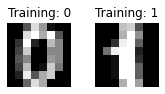

In [5]:
for i in range(0,2):
    plt.subplot(3, 4,i + 1)
    plt.axis('off')
    plt.gray()
    plt.imshow(digits.images[i])
    plt.title('Training: {}'.format(digits.target[i]))
plt.show()

#### 1.3.- Preparar de Datos

Reducción de Dimensión de Imagen 8x8 a 1 Dimensión

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
samples_len = len(digits.images)
samples_reshape = digits.images.reshape((samples_len, -1))

In [8]:
samples_reshape.shape

(1797, 64)

Generar Set de Entrenamiento y Set de Testeo

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(samples_reshape, target, train_size=.4)

#### 1.4.- Entrenar Modelo SVC

In [10]:
classifier = svm.SVC()
classifier.fit(X_train,y_train)

SVC()

#### 1.5.- Evaluar Modelo

Clasificación de Imagenes

In [11]:
y_pred = classifier.predict(X_test)

Matriz de Confusión

In [12]:
pd.DataFrame(confusion_matrix(y_pred,y_test))

,0,1,2,3,4,5,6,7,8,9
0,110,0,0,0,0,0,0,0,0,0
1,0,101,1,0,0,0,1,0,6,0
2,0,0,91,0,0,0,0,0,0,0
3,0,0,0,112,0,0,0,0,0,0
4,0,0,0,0,116,0,0,0,0,0
5,0,0,0,2,0,106,1,0,0,1
6,0,0,0,0,0,0,112,0,1,0
7,0,0,0,1,0,0,0,107,0,1
8,0,0,0,0,0,0,0,0,90,0
9,0,0,0,0,1,1,0,0,5,112


Metricas del Modelo

In [13]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       0.93      1.00      0.96       101
           2       1.00      0.99      0.99        92
           3       1.00      0.97      0.99       115
           4       1.00      0.99      1.00       117
           5       0.96      0.99      0.98       107
           6       0.99      0.98      0.99       114
           7       0.98      1.00      0.99       107
           8       1.00      0.88      0.94       102
           9       0.94      0.98      0.96       114

    accuracy                           0.98      1079
   macro avg       0.98      0.98      0.98      1079
weighted avg       0.98      0.98      0.98      1079



### 2.- Clasificación de Perros y Gatos con KNN

Definición de Funciones

In [14]:
def train(animal_class):         #Funcion para asignar clase a las imagenes de Gatos y Perros
    import os
    labels = []
    train_dogs = []
    for i in os.listdir(TRAIN_DIR):
        if animal_class in i:
            train_dogs.append(i)
            labels.append(1)
        else:
            labels.append(0)            
    return labels

In [15]:
def HistogramImage (source, results):  #Funcion para generar una lista con pixeles de la imagen en blanco y negro
    from PIL import Image 
    for i in source:
        pil_im = Image.open(i).convert('L')
        pix_val = pil_im.histogram() 
        results.append(pix_val)    

In [16]:
def KNN_BestK (X_train, X_test, y_train, y_test, KNN):   #Entrega un KNN con el mejor n_neightbor en rango de 1 a 10
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split 
    best_score = 0.0
    best_k = -1
    for k in range(1,10):    
        KNN = KNeighborsClassifier(n_neighbors=k)
        KNN = KNN.fit(X_train, y_train)
        score = KNN.score (X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score  
    print(f'k = {best_k}')
    print(f'Accuracy = {best_score}')
    KNN = KNeighborsClassifier(n_neighbors = best_k)
    KNN = KNN.fit(X_train, y_train)
    #return best_k
    return KNN

In [17]:
def ClassifyImage(images_dir): # Función para clasificar una imagen y mostrarla junto al resultado
    import random
    from PIL import Image
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    image_random = random.choice(range(len(images_dir)))
    image2 = [images_dir[image_random]]
    seo=[]
    HistogramImage(image2, seo)
    animal = KNN.predict(seo)
    animal
    if animal[0] == 1:
        print(f'El animal de la foto es Perro')
    elif animal[0] ==0:
        print(f'El animal de la foto es Gato')
    return Image.open( images_dir[image_random])

#### 2.1.- Importar DataSet

In [18]:
TRAIN_DIR = 'C:/Users/pablo/OneDrive/001 - Estudio/001 - Universitario/000 - Magister Data Science/000 - Asignaturas/002 - Machine Learning/Tareas/ML-Laboratorio 3/'
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for training images

In [19]:
train_classes = train('dog')   

In [20]:

q=pd.DataFrame(train_images)
q['class']= train_classes
print(q['class'].value_counts())
q.head(2)

0    12500
1    12500
Name: class, dtype: int64


,0,class
0,C:/Users/pablo/OneDrive/001 - Estudio/001 - Un...,0
1,C:/Users/pablo/OneDrive/001 - Estudio/001 - Un...,0


#### 2.2.- Mostrar 2 Imagenes

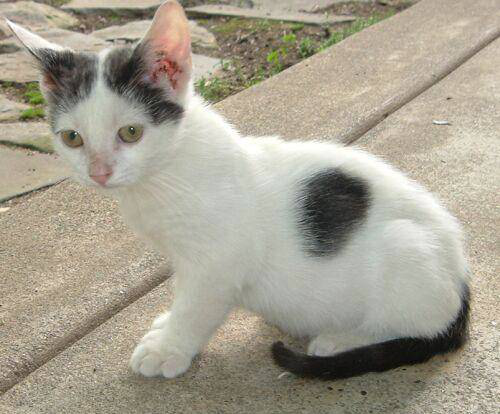

In [21]:
Image.open( TRAIN_DIR + 'cat.3.jpg')

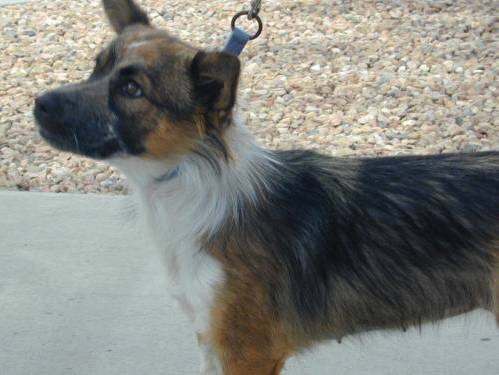

In [22]:
Image.open( TRAIN_DIR + 'dog.3.jpg')

#### 2.3.- Preparar Datos

In [23]:
results = []
HistogramImage(train_images, results)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(results, train_classes, train_size=.98)

In [25]:
pd.DataFrame(y_train).value_counts()

1    12264
0    12236
dtype: int64

#### 2.4.- Entrenar Modelo KNN

In [26]:
KNN = KNeighborsClassifier()
KNN = KNN_BestK (X_train, X_test, y_train, y_test, KNN)

k = 4
Accuracy = 0.582


#### 2.5.- Evaluar Modelo

In [27]:
pd.DataFrame(y_test).value_counts()

0    264
1    236
dtype: int64

In [28]:
y_pred = KNN.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_pred, y_test))

,0,1
0,162,107
1,102,129


In [30]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61       264
           1       0.56      0.55      0.55       236

    accuracy                           0.58       500
   macro avg       0.58      0.58      0.58       500
weighted avg       0.58      0.58      0.58       500



El animal de la foto es Gato


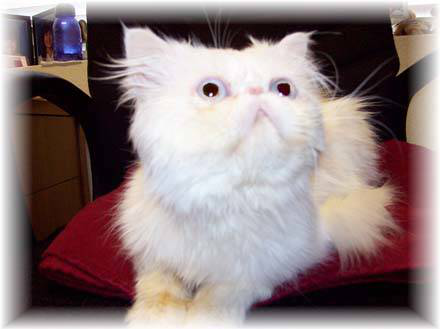

In [31]:
ClassifyImage(train_images)

El animal de la foto es Gato


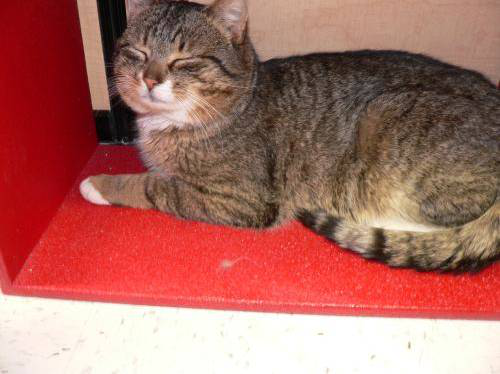

In [32]:
ClassifyImage(train_images)